# 1 引言

本文将从算法原理出发，展开介绍KNN算法，并结合机器学习中常用的Iris数据集通过代码实例演示KNN算法用法和实现。

# 2 算法原理 

KNN（kNN，k-NearestNeighbor）算法，或者说K近邻算法，应该算是机器学习中众多分类算法最好理解的一个了。古语有云：物以类聚，人以群分。没错，KNN算法正是这一思想为核心，对数据进行分类。

而所谓K近邻，意思是对于每一个待分类样本，都可以以与其最近的K个样本点的多数分类来来进行划分。举个例子，办公室新来了一个同事，他的位置边上坐着的10个（K=10)同事都是大多是Python程序员，我们会猜测这个新同事是Python程序员；如果把判断依据扩大的整个办公室，假设办公室有50个人（K=50），其中java程序员35个，那么我们就会认为这个新同事是java程序员。

回到KNN算法，对数据进行分类的思想和流程与我们判断新同事的工作是一样的：

（1）计算待分类样本与所有已知分类的样本之间的距离；

（2）对多有距离进行按升序排序；

（3）取前K个样本；

（4）统计前K个样本中各分类出现的频数；

（5）将待分类样本划分到频数最高的分类中。

好了，我想现在你应该对KNN算法有了基本的认识了。不过有几个问题还得明确一下：

K值如何确定？

如何度量距离？

先来说说如何确定K值。对于K值，从KNN算法的名称中，我们可以看出K值得重要性是毋庸置疑的。我们用下图的例子来说一说K值得样本分类的重要性：
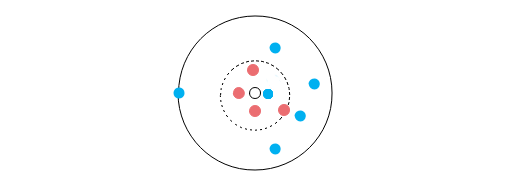
图中所有圆点构成一个数据集，圆点颜色代表分类，那么，图中无色圆点划分到哪个类呢？

当K=1时，离透明点最近的点是蓝点，那么我们应该将透明圆点划分到蓝点所在类别中；

当K=5时，离透明点最近的5个点中有4个红点，1个蓝点，那么我们应该将透明圆点划分到红点所属的类别中；

当K=10时，离透明点最近的10个点中有4个红点，6个蓝点，那么我们应该将透明圆点划分到蓝点所属的类别中。

你看，最终的结果因K值而异，K值过大过小都会对数据的分类产生不同程度的影响：

当K取较小值时，意味着根据与待测样本距离较小的小范围内样本对待测样本的类别进行预测，这么做的优点是较远范围的样本数据不会对分类结果产生影响，训练误差（机器学习模型在训练数据集上表现出的误差叫做训练误差）较小。但却容易导致过拟合现象的产生，增大泛化误差（在任意一个测试数据样本上表现出的误差的期望值叫做泛化误差）模型变得复杂，一旦带测验本附近有异常数据存在，分类经过就可能会产生较大的影响，例如上图上K=1时，如果最近的蓝点是异常数据，那么对透明圆点的预测结果就因此变得异常。

当K较大值时，意味着综合更大范围的样本对待测验本类别进行预测，优点是可以减少泛化误差，但训练误差随之增大，模型变得简单。一个极端的例子就是如上图所示，当K取值为整个数据集规模时，整个预测过程就没有太大价值，所有待测样本类别都会被预测为数据集中样本数量多的一类。

对于K值的确定，目前并没有专门的理论方案，一个较普遍的做法就是将数据集分为两部分，一部分用作训练集，一部分用作测试集，从K取一个较小值开始，逐步增加K值，最终去准确率最高的一个K值。

一般而言，K取值不超过20，上限是n的开方，随着数据集的增大，K的值也要增大。另外，K的取值尽量要取奇数，以保证在计算结果最后会产生一个较多的类别，如果取偶数可能会产生相等的情况，不利于预测。

关于距离度量，我们最熟悉的、使用最广泛的就是欧式距离了。对于$d$维数据点$x$和$y$之间的欧氏距离定义为：
$$E(x,y) = \sqrt {\sum\limits_{i = 0}^d {{{({x_i} - {y_i})}^2}} } $$

除了欧氏距离外，距离度量方法还有余弦距离、哈曼顿距离、切比雪夫距离等，但使用不多，不介绍了。

最后总结一下KNN算法：

KNN的主要优点有：

1） 理论成熟，思想简单，既可以用来做分类也可以用来做回归

2） 可用于非线性分类

3） 和朴素贝叶斯之类的算法比，对数据没有假设，准确度高，对异常点不敏感

4） 由于KNN方法主要靠周围有限的邻近的样本，而不是靠判别类域的方法来确定所属类别的，因此对于类域的交叉或重叠较多的待分样本集来说，KNN方法较其他方法更为适合

5）该算法比较适用于样本容量比较大的类域的自动分类，而那些样本容量较小的类域采用这种算法比较容易产生误分

KNN的主要缺点有：

1）计算量大，尤其是特征数非常多的时候

2）样本不平衡的时候，对稀有类别的预测准确率低

3）使用懒散学习方法，基本上不学习，导致预测时速度比起逻辑回归之类的算法慢

4）相比决策树模型，KNN模型可解释性不强

# 3 Python实现KNN算法

我们用Python来手动实现KNN算法，采用的数据集为Iris数据集，可以从[UCI官网](http://archive.ics.uci.edu/ml/datasets/Iris)上下载，然后放到当前目录下：

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
from sklearn.utils import shuffle

In [2]:
# 读取数据，并指定列名
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class_name']  # 为每列指定一个列名
iris_data = pd.read_csv('./data/iris.data',names=names)

查看一下数据的基本情况:

In [3]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


可以看到，各属性均值、值域各不相同，为了消除各属性因为取值范围的不同对算法的不良影响，最好对数据进行归一化：

In [4]:
# 数据归一化
for col in names[:-1]:
    clo_max = iris_data[col].max()
    clo_min = iris_data[col].min()
    iris_data[col] = (iris_data[col] - clo_min) / (clo_max - clo_min)

In [5]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class_name
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
5,0.305556,0.791667,0.118644,0.125000,Iris-setosa
6,0.083333,0.583333,0.067797,0.083333,Iris-setosa
7,0.194444,0.583333,0.084746,0.041667,Iris-setosa
8,0.027778,0.375000,0.067797,0.041667,Iris-setosa
9,0.166667,0.458333,0.084746,0.000000,Iris-setosa


源数据集是根据样本类别进行排序的，所以需要先打乱数据：

In [6]:
iris_data = shuffle(iris_data)  # 打乱数据
iris_data = iris_data.reset_index(drop=True)  # 重设索引
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class_name
0,0.611111,0.500000,0.694915,0.791667,Iris-virginica
1,0.638889,0.416667,0.576271,0.541667,Iris-versicolor
2,0.472222,0.583333,0.593220,0.625000,Iris-versicolor
3,0.416667,0.333333,0.694915,0.958333,Iris-virginica
4,0.361111,0.208333,0.491525,0.416667,Iris-versicolor
5,0.111111,0.500000,0.050847,0.041667,Iris-setosa
6,0.694444,0.333333,0.644068,0.541667,Iris-versicolor
7,0.194444,0.125000,0.389831,0.375000,Iris-versicolor
8,0.083333,0.583333,0.067797,0.083333,Iris-setosa
9,0.583333,0.458333,0.762712,0.708333,Iris-virginica


将数据集分为两部分，一部分用作训练模型，一部分用作测试模型：

In [7]:
train_data = iris_data[:120]  # 前120条作为训练集
test_data = iris_data[120:]  # 120~150作为作测试集

In [8]:
def distance(data1,data2):  # 计算两点距离
    dist = 0
    for i, j in zip(data1, data2):
        dist = dist + (i - j) ** 2
    dist = dist ** 0.5
    return dist

In [9]:
def knn(predict_data, train_data, k):
    dist_list  = []
    for index, row in train_data.iterrows():  # 与每一个训练集中数据计算距离
        dist = distance(predict_data[:-1], row[:-1])
        dist_list.append(dist)
    dist_df = train_data.loc[:,['class_name']]
    dist_df['distance'] = dist_list  # 将距离和类标签放入同一DataFrame中
    dist_df = dist_df.sort_values(by=['distance'],ascending=True)  # 根据距离进行升序排序
    dist_df_k = dist_df[:k]  #取前K个
    predict_class = 'Iris-setosa'
    class_num = 0
    for class_name in ['Iris-setosa','Iris-versicolor','Iris-virginica']:  # 统计三个类别那个最多
        temp_num = dist_df_k.groupby(['class_name']).size().get(class_name,0)  # 各类别的数量
        if temp_num > class_num:
            predict_class = class_name
            class_num = temp_num
    return predict_class

In [10]:
def predict(test_data, train_data, k):
    predict_class_list = []
    for _, test_row in test_data.iterrows():
        predict_class = knn(test_row, train_data, k)
        predict_class_list.append(predict_class)
    result_df = test_data.copy()
    result_df['predict_class'] = predict_class_list
    print(result_df.loc[:,['class_name','predict_class']].head(10))
    return result_df
result_df = predict(test_data, train_data, 10) 

          class_name    predict_class
120  Iris-versicolor  Iris-versicolor
121      Iris-setosa      Iris-setosa
122      Iris-setosa      Iris-setosa
123  Iris-versicolor  Iris-versicolor
124      Iris-setosa      Iris-setosa
125      Iris-setosa      Iris-setosa
126   Iris-virginica   Iris-virginica
127  Iris-versicolor  Iris-versicolor
128      Iris-setosa      Iris-setosa
129   Iris-virginica   Iris-virginica


In [11]:
# 计算准确率
def calculate_accuracy(result_df):
    sum = len(result_df)
    right = 0
    for index, row in result_df.iterrows():
        if row['class_name'] == row['predict_class']:
            right += 1
    accuracy = right / sum 
    print('准确率：',accuracy)
calculate_accuracy(result_df)

准确率： 0.9333333333333333


# 4 sklearn库中的KNN算法

最后通过调用sklearn库中的KNN算法来实现Iris数据预测。  
虽然sklearn库中自带Iris数据集，不过为了更好与上一章节实现进行对比，我们还是和上面一样从文件中读取数据。

In [12]:
from sklearn.neighbors import KNeighborsClassifier  # KNN算法
from sklearn.model_selection import train_test_split  # 分割数据集
from sklearn.preprocessing import MinMaxScaler  # 数据归一化
import pandas as pd

In [14]:
# 读取数据，并指定列名
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class_name']  # 为每列指定一个列名
iris_data = pd.read_csv('./data/iris.data',names=names)

在使用sklearn库进行预测时，属性和分类必须分开保存：

In [15]:
iris_x = iris_data.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # 取出所有属性
iris_y = iris_data.loc[:,['class_name']]  # 取出所有分类

用sklearn自带库对数据进行归一化：

In [16]:
iris_x = MinMaxScaler().fit_transform(iris_x)

In [17]:
# 将数据分为训练集和测试机，train_test_split自带打乱功能
train_data_x,test_data_x,train_data_y,test_data_y = train_test_split(iris_x, iris_y, test_size=0.25, random_state=0)

In [18]:
train_data_y = [elem[0] for elem in train_data_y.values]  # 转换为一维list，训练模型时类别最好使用一维数组存放

In [19]:
# 定义模型
knn=KNeighborsClassifier(n_neighbors=10)

In [20]:
# 训练模型
knn.fit(train_data_x,train_data_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [21]:
result=knn.predict(test_data_x)  # 预测

In [22]:
test_data_y = test_data_y.reset_index(drop=True)  # 重设索引，不然索引也是乱序的，下面不好遍历

In [23]:
# 计算准确率
count=0
for i,row in test_data_y.iterrows():
    if result[i]==row['class_name']:
        count+=1
print('准确率:',float(count)/float(len(test_data_y)))

准确率: 0.9736842105263158
